In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow  as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *

from tensorflow.keras.callbacks import *
import os

In [106]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.keras.backend.clear_session()
tf.config.optimizer.set_jit(True)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
assert tf.executing_eagerly()

In [107]:
frame = pd.read_csv(r'newdatacount.csv')
df = pd.DataFrame(frame)
df.drop(df[df['year'] == 2020].index, inplace = True) #'REMOVE2020'
#df.drop(df[df['year'] == 2015].index, inplace = True) #remove 2015
#df.drop(df[df['year'] == 2019].index, inplace = True) #'REMOVE2020'

df = df[df['station']=='Grove St PATH']

#df =pd.get_dummies(df, prefix=['station' ])
df = df[['year', 'week','season', 'count' ]]
df =pd.get_dummies(df, prefix=['season'])
#reading and dumming datta
col = list(df.columns.values)

#df = df[['year', 'week','season', 'anzahl' ]]
test = pd.DataFrame(df)


print(col)
print(df.min())

['year', 'week', 'count', 'season_autumn', 'season_spring', 'season_summer', 'season_winter']
year             2015
week                1
count              63
season_autumn       0
season_spring       0
season_summer       0
season_winter       0
dtype: int64


In [108]:
wframe = pd.read_csv(r'weather.csv')
weather = pd.DataFrame(wframe)
weather.head()

,year,week,sunHour,totalSnow_cm,FeelsLikeC,cloudcover,humidity,precipMM,tempC,windspeedKmph
0,2015,39,10.00,0.0,18.57,37.86,66.00,0.00,21.86,13.57
1,2015,40,8.57,0.0,14.86,69.29,82.14,4.73,18.14,22.43
2,2015,41,9.31,0.0,16.29,25.00,71.57,0.71,19.57,11.71
3,2015,42,8.70,0.0,12.29,17.00,65.57,0.07,16.29,15.71
4,2015,43,7.81,0.0,12.29,27.29,68.00,0.56,16.57,16.29


In [109]:
df = pd.merge(df,weather,on=['year','week'],how='outer').dropna()
#df = df.reset_index()
print(df[df.index.duplicated()])
df = pd.DataFrame(df,columns=['year', 'week','season_autumn', 'season_spring', 'season_summer', 'season_winter','sunHour','totalSnow_cm','FeelsLikeC','cloudcover','humidity','precipMM','tempC','windspeedKmph', 'count'])


Empty DataFrame
Columns: [year, week, count, season_autumn, season_spring, season_summer, season_winter, sunHour, totalSnow_cm, FeelsLikeC, cloudcover, humidity, precipMM, tempC, windspeedKmph]
Index: []


In [110]:
#df.to_csv('kitrainweathe.csv',index=False)

In [111]:
x = df.iloc[:,0:-1].values
y = df.iloc[:,14:15].values
np.set_printoptions(suppress=True)
print(x[21])
print(y[21])
print(x)
print(y)

[2016.      6.      0.      0.      0.      1.      5.57    0.24  -10.57
   68.     67.29    0.43   -2.29   21.29]
[216.]
[[2015.     39.      0.   ...    0.     21.86   13.57]
 [2015.     39.      1.   ...    0.     21.86   13.57]
 [2015.     40.      1.   ...    4.73   18.14   22.43]
 ...
 [2019.     51.      0.   ...    3.83    2.57   15.  ]
 [2019.     51.      1.   ...    3.83    2.57   15.  ]
 [2019.     52.      0.   ...    0.14    7.29    9.29]]
[[  98.]
 [ 374.]
 [ 410.]
 [ 546.]
 [ 562.]
 [ 539.]
 [ 488.]
 [ 574.]
 [ 369.]
 [ 414.]
 [ 283.]
 [ 313.]
 [ 316.]
 [ 339.]
 [ 214.]
 [ 150.]
 [ 251.]
 [ 293.]
 [ 191.]
 [ 110.]
 [ 244.]
 [ 216.]
 [ 214.]
 [ 277.]
 [ 279.]
 [ 399.]
 [ 391.]
 [ 415.]
 [ 370.]
 [ 340.]
 [ 432.]
 [ 536.]
 [ 483.]
 [ 459.]
 [ 534.]
 [ 551.]
 [ 630.]
 [ 498.]
 [ 590.]
 [ 621.]
 [ 103.]
 [ 546.]
 [ 577.]
 [ 569.]
 [ 608.]
 [ 596.]
 [ 537.]
 [ 860.]
 [ 837.]
 [ 867.]
 [ 919.]
 [ 864.]
 [ 815.]
 [1013.]
 [ 339.]
 [ 621.]
 [ 873.]
 [ 888.]
 [ 913.]
 [ 778.]
 [

In [112]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler(feature_range=(0,1))
y_scaler = MinMaxScaler(feature_range=(0,1))
# Fit train data 
x_scaler.fit(x)
y_scaler.fit(y)
x = x_scaler.transform(x)
y = y_scaler.transform(y)

In [113]:
split_horizontally_idx = int(x.shape[0]* 0.8)
x_train = x[:split_horizontally_idx , :]
x_test = x[split_horizontally_idx: , :]
y_train = y[:split_horizontally_idx , :]
y_test = y[split_horizontally_idx: , :]
print(x_train.shape); print(y_test.shape)

(191, 14)
(48, 1)


In [114]:
#reshape
#x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
#x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)
print(x_train.shape)

(48, 14)
(191, 14)


In [87]:
with tf.device('/device:GPU:0'):
    model = keras.models.load_model('kiweatherv2min2')

In [131]:

model = Sequential()
 
    
model.add(Dense(14, kernel_initializer='normal',  activation='relu', input_shape=(14,) ))
model.add(Dropout(0.3))
for i in range(11):
    model.add(Dense(14, kernel_initializer='normal',activation='relu'))
    model.add(Dropout(0.3))
model.add(Dense(1, kernel_initializer='normal',activation='linear'))


In [132]:
#0.0001 Adam(learning_rate=0.0000001)
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')

model.compile(optimizer= SGD(),loss='mse', metrics=['mae','mape'])

In [133]:
checkpoint = ModelCheckpoint('kiweatherv2grove', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='min' )

In [134]:
with tf.device('/device:GPU:0'):
    print(tf.device)
    """,callbacks=[checkpoint]"""
    model.fit(x_train, y_train, epochs=100 , batch_size=10,shuffle=False ,validation_data=(x_test, y_test),verbose = 2 )

<function device_v2 at 0x000001D8E3F63AF0>
Epoch 1/100
20/20 - 3s - loss: 0.1572 - mae: 0.3493 - mape: 223878.4062 - val_loss: 0.2734 - val_mae: 0.4764 - val_mape: 81.0704
Epoch 2/100
20/20 - 2s - loss: 0.0917 - mae: 0.2510 - mape: 856966.0625 - val_loss: 0.1948 - val_mae: 0.3927 - val_mape: 74.2039
Epoch 3/100
20/20 - 0s - loss: 0.0633 - mae: 0.2029 - mape: 1265748.2500 - val_loss: 0.1520 - val_mae: 0.3418 - val_mape: 71.7676
Epoch 4/100
20/20 - 0s - loss: 0.0511 - mae: 0.1828 - mape: 1557749.5000 - val_loss: 0.1276 - val_mae: 0.3112 - val_mape: 71.3158
Epoch 5/100
20/20 - 0s - loss: 0.0459 - mae: 0.1754 - mape: 1735435.2500 - val_loss: 0.1133 - val_mae: 0.2918 - val_mape: 71.3186
Epoch 6/100
20/20 - 0s - loss: 0.0438 - mae: 0.1728 - mape: 1857465.6250 - val_loss: 0.1046 - val_mae: 0.2798 - val_mape: 71.5517
Epoch 7/100
20/20 - 0s - loss: 0.0430 - mae: 0.1723 - mape: 1949431.5000 - val_loss: 0.0992 - val_mae: 0.2717 - val_mape: 71.7071
Epoch 8/100
20/20 - 0s - loss: 0.0426 - mae: 0.17

Epoch 64/100
20/20 - 0s - loss: 0.0428 - mae: 0.1745 - mape: 2111924.5000 - val_loss: 0.0893 - val_mae: 0.2570 - val_mape: 72.3157
Epoch 65/100
20/20 - 0s - loss: 0.0427 - mae: 0.1743 - mape: 2095408.2500 - val_loss: 0.0892 - val_mae: 0.2570 - val_mape: 72.3173
Epoch 66/100
20/20 - 0s - loss: 0.0427 - mae: 0.1745 - mape: 2114077.7500 - val_loss: 0.0892 - val_mae: 0.2570 - val_mape: 72.3166
Epoch 67/100
20/20 - 0s - loss: 0.0426 - mae: 0.1742 - mape: 2103782.2500 - val_loss: 0.0892 - val_mae: 0.2570 - val_mape: 72.3179
Epoch 68/100
20/20 - 0s - loss: 0.0428 - mae: 0.1745 - mape: 2113237.7500 - val_loss: 0.0893 - val_mae: 0.2570 - val_mape: 72.3158
Epoch 69/100
20/20 - 0s - loss: 0.0427 - mae: 0.1743 - mape: 2111190.5000 - val_loss: 0.0892 - val_mae: 0.2570 - val_mape: 72.3196
Epoch 70/100
20/20 - 0s - loss: 0.0427 - mae: 0.1744 - mape: 2089407.3750 - val_loss: 0.0892 - val_mae: 0.2570 - val_mape: 72.3187
Epoch 71/100
20/20 - 0s - loss: 0.0427 - mae: 0.1745 - mape: 2101801.5000 - val_los

In [119]:
with tf.device('/device:GPU:0'):
    results = model.evaluate(x_test, y_test )
print("test loss, test acc:", results)

2/2 [==============================] - 0s 8ms/step - loss: 0.0615 - mae: 0.2137 - mape: 78.0471
test loss, test acc: [0.06148385629057884, 0.21366934478282928, 78.04710388183594]


In [110]:
test_data = x_test[21] 
print(test_data.shape)
test_data = np.reshape(test_data,(test_data.shape[0],))
print(test_data.shape)
with tf.device('/device:CPU:0'):
    print(y_scaler.inverse_transform(model.predict(test_data.reshape(1,10))))
print(y_scaler.inverse_transform(y_test)[21])

(10,)
(10,)
[[768.4144]]
[1101.]


In [31]:
#save model
model.save('kiweatherv210')

INFO:tensorflow:Assets written to: kiweatherv210\assets


      year  week  count  season_autumn  season_spring  season_summer  \
52    2015    39     98              0              0              1   
67    2015    39    374              1              0              0   
102   2015    40    410              1              0              0   
137   2015    41    546              1              0              0   
172   2015    42    562              1              0              0   
...    ...   ...    ...            ...            ...            ...   
8509  2019     3    660              0              0              0   
8559  2019     4    534              0              0              0   
8609  2019     5    489              0              0              0   
8660  2019     6    698              0              0              0   
8710  2019     7    629              0              0              0   

      season_winter          y2   yearweek  
52                0  620.157104 2015-09-28  
67                0  620.157104 2015-09-28  


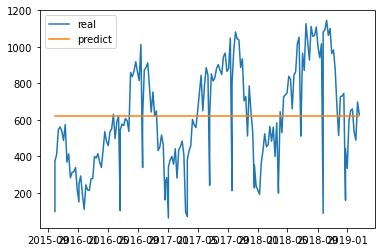

In [129]:
predict_train = model.predict(x_train)
y1 = y_scaler.inverse_transform(y_train).reshape(  y_train.shape[0])
y2 = y_scaler.inverse_transform(predict_train).reshape(  y_train.shape[0])
#test = pd.DataFrame({ 'y':y1 ,'y2':y2})#

test1 = test.iloc[:y_train.shape[0]]
test1 = pd.DataFrame(test1)
test1['y2'] = y2
test1['yearweek'] = pd.to_datetime(test1['year'].astype(str) + ' ' + test1['week'].astype(str) + ' 1',format='%Y %U %w')
print(test1)



plt.plot(test1['yearweek'],test1['count'],label='real'   )
plt.plot(test1['yearweek'],test1['y2'],label='predict'  )

plt.legend(loc="upper left")
plt.show()

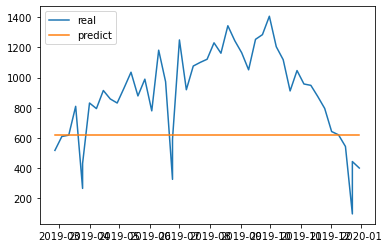

In [130]:
predict_test = model.predict(x_test)
y1 = y_scaler.inverse_transform(y_test).reshape(  y_test.shape[0])
y2 = y_scaler.inverse_transform(predict_test).reshape(  y_test.shape[0])
#test = pd.DataFrame({ 'y':y1 ,'y2':y2})#
test2 = test.iloc[-y_test.shape[0]:]
test2 = pd.DataFrame(test2)
test2['y2'] = y2
test2['yearweek'] = pd.to_datetime(test2['year'].astype(str) + ' ' + test2['week'].astype(str) + ' 1',format='%Y %U %w')
#print(test2)


plt.plot(test2['yearweek'],test2['count'],label='real'   )
plt.plot(test2['yearweek'],test2['y2'],label='predict'  )

plt.legend(loc="upper left")
plt.show()